# Pandas

In [3]:
import pandas as pd

## Read file

In [4]:
#read file
df = pd.read_html("http://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=4104&SYEAR=2017&SSEASON=2&REPORT_ID=C", encoding='big5')[3]
df.head()

,0,1,2
0,會計項目,2017年01月01日至2017年06月30日,2016年01月01日至2016年06月30日
1,現金流量表,NaN,NaN
2,營業活動之現金流量－間接法,NaN,NaN
3,繼續營業單位稅前淨利（淨損）,309336,318388
4,本期稅前淨利（淨損）,309336,318388


In [5]:
df = pd.read_csv("..\\FileOperation\\test.csv", header=None)
df.head()

,0,1
0,A & P Andreou & Paraskevaids Entrprs PCL,NaN
1,A.G. Barr plc,NaN
2,Arca Continental SAB de CV,NaN
3,Booker Group Plc,NaN
4,Bucur SA,X


In [6]:
df = pd.read_json("..\\FileOperation\\test.json")
df.head()

,campus,category,code,credits,department,for_dept,grade,location,note,obligatory_tf,professor,time,title
0,SCU,必修類,505.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B408],None,True,[鹿憶鹿],"[{'day': 4, 'time': ['1', '2']}]",文學概論
1,SCU,必修類,508.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B408],None,True,[李鴻儒],"[{'day': 3, 'time': ['3', '4']}]",國學導讀
2,SCU,選修類,514.0,2.0,中一Ａ,中一Ａ,中一Ａ,[D0408],None,False,[涂美雲],"[{'day': 4, 'time': ['3', '4']}]",論語
3,SCU,選修類,518.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B407],None,False,[游淑珺],"[{'day': 5, 'time': ['3', '4']}]",中國古典要籍選讀
4,SCU,選修類,549.0,2.0,中一Ａ,中一Ａ,中一Ａ,[D0314],None,False,[陳素素],"[{'day': 1, 'time': ['5', '6']}]",歐蘇文


# DataDescription

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('..//FileOperation//netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [3]:
df.info()
len(df[pd.isnull(df['ratingLevel'])])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


59

In [5]:
print(len(df))
# print(len(df.dropna()))
df.dropna(inplace=True)
# print(len(df.drop_duplicates()))
df.drop_duplicates(inplace=True)
print(len(df))

246
246


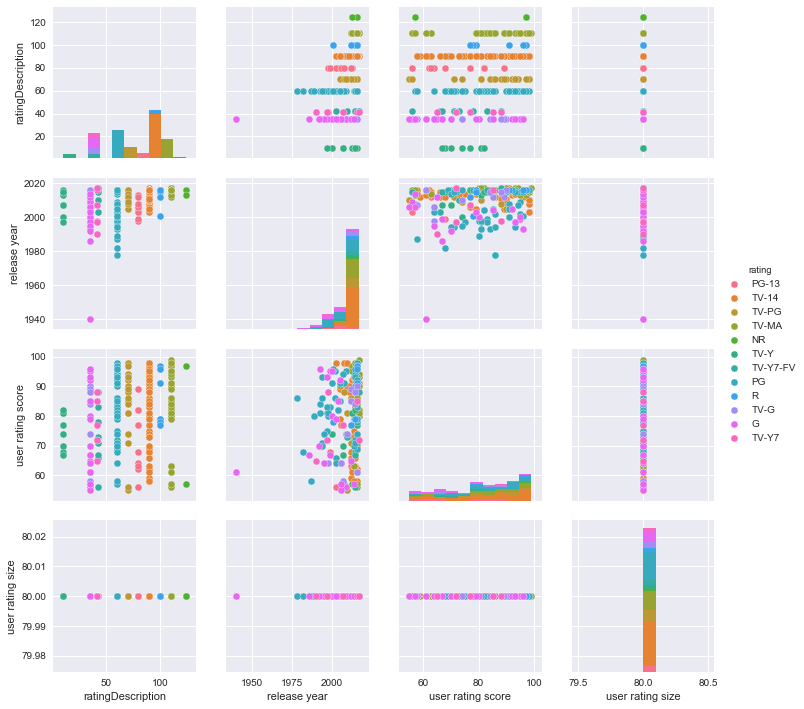

In [9]:
# sns.pairplot(df)
sns.pairplot(df, hue='rating');

In [8]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


In [11]:
df_by_year = df.groupby('release year')
print(type(df_by_year))

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [17]:
list(df_by_year)

[(1940,         title rating                                ratingLevel  \
  761  Fantasia      G  General Audiences. Suitable for all ages.   
  
       ratingDescription  release year  user rating score  user rating size  
  761                 35          1940               61.0                80  ),
 (1978,
        title rating                                        ratingLevel  \
  252  Grease     PG  Parental guidance suggested. May not be suitab...   
  
       ratingDescription  release year  user rating score  user rating size  
  252                 60          1978               86.0                80  ),
 (1982,      title rating                     ratingLevel  ratingDescription  \
  658  Annie     PG  adult content and mld violence                 60   
  
       release year  user rating score  user rating size  
  658          1982               68.0                80  ),
 (1986,
                  title rating                                ratingLevel  \
  762  An Amer

In [22]:
df_by_year.describe().head()
# df_by_year.describe()['ratingDescription']['max']

ratingDescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user rating score        ...              user rating size        \
                         count  mean  ...    75%   max            count  mean   
release year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [24]:
df_med_by_year = df_by_year.median()
print(type(df_med_by_year))
df_med_by_year.head()

<class 'pandas.core.frame.DataFrame'>


,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [25]:
print(df.index)
print(df_med_by_year.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)
Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


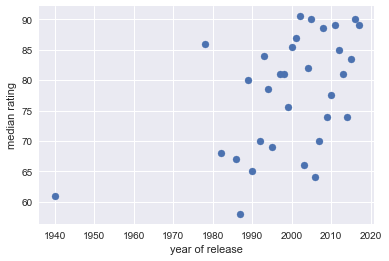

In [26]:
df_rat_by_year = df_med_by_year['user rating score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');

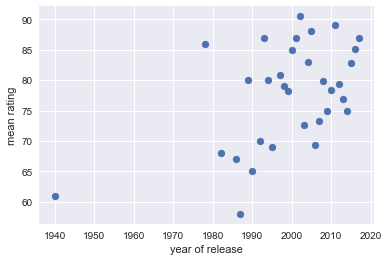

In [30]:
df_mean_by_year = df_by_year.mean()['user rating score']
plt.scatter(df_mean_by_year.index, df_mean_by_year)
plt.xlabel("year of release")
plt.ylabel("mean rating")

# Selection

In [31]:
df = pd.read_html("http://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=4104&SYEAR=2017&SSEASON=2&REPORT_ID=C", encoding='big5')[3]
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [33]:
df.head()
# df[:10]

,0,1,2
0,會計項目,2017年01月01日至2017年06月30日,2016年01月01日至2016年06月30日
1,現金流量表,NaN,NaN
2,營業活動之現金流量－間接法,NaN,NaN
3,繼續營業單位稅前淨利（淨損）,309336,318388
4,本期稅前淨利（淨損）,309336,318388


In [31]:
print(df.columns)
print(df.index)

Int64Index([0, 1, 2], dtype='int64')
RangeIndex(start=0, stop=87, step=1)


In [33]:
df[1]
col_name_li= [0,1]
df[col_name_li]

,0,1
0,會計項目,2017年01月01日至2017年06月30日
1,現金流量表,NaN
2,營業活動之現金流量－間接法,NaN
3,繼續營業單位稅前淨利（淨損）,309336
4,本期稅前淨利（淨損）,309336
5,調整項目,NaN
6,收益費損項目,NaN
7,折舊費用,36661
8,攤銷費用,4745
9,呆帳費用提列（轉列收入）數,-15525


In [36]:
print(df.xs(3))
print(df[1][3])

0    繼續營業單位稅前淨利（淨損）
1            309336
2            318388
Name: 3, dtype: object
309336


In [37]:
len(df)

87

In [42]:
for row in df.iterrows():
    print("row[0]= \n", row[0])
    print("row[1]= \n", row[1])

row[0]= 
 0
row[1]= 
 0                       會計項目
1    2017年01月01日至2017年06月30日
2    2016年01月01日至2016年06月30日
Name: 0, dtype: object
row[0]= 
 1
row[1]= 
 0    現金流量表
1      NaN
2      NaN
Name: 1, dtype: object
row[0]= 
 2
row[1]= 
 0    營業活動之現金流量－間接法
1              NaN
2              NaN
Name: 2, dtype: object
row[0]= 
 3
row[1]= 
 0    繼續營業單位稅前淨利（淨損）
1            309336
2            318388
Name: 3, dtype: object
row[0]= 
 4
row[1]= 
 0    本期稅前淨利（淨損）
1        309336
2        318388
Name: 4, dtype: object
row[0]= 
 5
row[1]= 
 0    調整項目
1     NaN
2     NaN
Name: 5, dtype: object
row[0]= 
 6
row[1]= 
 0    收益費損項目
1       NaN
2       NaN
Name: 6, dtype: object
row[0]= 
 7
row[1]= 
 0     折舊費用
1    36661
2    44752
Name: 7, dtype: object
row[0]= 
 8
row[1]= 
 0    攤銷費用
1    4745
2    5573
Name: 8, dtype: object
row[0]= 
 9
row[1]= 
 0    呆帳費用提列（轉列收入）數
1           -15525
2             3322
Name: 9, dtype: object
row[0]= 
 10
row[1]= 
 0    透過損益按公允價值衡量金融資產及負債之淨損失（利益）
1                       

In [36]:
def applyFunction(row):
    print(row[0], row[1], row[2])
    print("========================")
df.apply(applyFunction, axis=1)

會計項目 2017年01月01日至2017年06月30日 2016年01月01日至2016年06月30日
現金流量表 nan nan
營業活動之現金流量－間接法 nan nan
繼續營業單位稅前淨利（淨損） 309336 318388
本期稅前淨利（淨損） 309336 318388
調整項目 nan nan
收益費損項目 nan nan
折舊費用 36661 44752
攤銷費用 4745 5573
呆帳費用提列（轉列收入）數 -15525 3322
透過損益按公允價值衡量金融資產及負債之淨損失（利益） 14001 4554
利息費用 17236 19774
利息收入 -9674 -19304
股利收入 -11760 -7171
採用權益法認列之關聯企業及合資損失（利益）之份額 -52771 -62396
處分及報廢不動產、廠房及設備損失（利益） 508 -11419
處分待出售非流動資產損失（利益） 0 -54018
處分投資損失（利益） -4550 -4415
處分採用權益法之投資損失（利益） 60 0
金融資產減損損失 5000 0
金融資產減損迴轉利益 0 -3506
非金融資產減損損失 45 0
非金融資產減損迴轉利益 0 -947
未實現銷貨利益（損失） 48844 30891
已實現銷貨損失（利益） -48191 -30616
其他項目 -7541 -1395
收益費損項目合計 -22912 -86321
與營業活動相關之資產／負債變動數 nan nan
與營業活動相關之資產之淨變動 nan nan
持有供交易之金融資產（增加）減少 -8230 253
應收票據（增加）減少 52863 -7695
應收帳款（增加）減少 99976 5676
其他應收款（增加）減少 805565 -608644
存貨（增加）減少 -58842 1384
預付款項（增加）減少 -134 2567
其他流動資產（增加）減少 -21197 -10037
其他營業資產（增加）減少 -4950 4245
與營業活動相關之資產之淨變動合計 865051 -612251
與營業活動相關之負債之淨變動 nan nan
持有供交易之金融負債增加（減少） 0 -3817
應付票據增加（減少） 7251 2093
應付帳款增加（減少） -302181 -119501
其他應付款增加（減少）

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
      ... 
57    None
58    None
59    None
60    None
61    None
62    None
63    None
64    None
65    None
66    None
67    None
68    None
69    None
70    None
71    None
72    None
73    None
74    None
75    None
76    None
77    None
78    None
79    None
80    None
81    None
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object

In [37]:
df = pd.read_csv("..\\FileOperation\\test.csv", header=None)
df[pd.notnull(df[1])]
df[df[1] == 'X']

,0,1
4,Bucur SA,X
15,Dhofar Beverage & Food Stuff Co SAOG,X
16,Dubai Refreshments PJSC,X
18,Eurocash SA,X
26,Hamama Meir Trading (1996) Ltd,X
27,Hung Fook Tong Group Holdings Ltd,X
39,Mitsubishi Shokuhin Co Ltd,X
47,Oman Refreshment Company,X
53,RG Brands AO,X
58,Sligro Food Group N.V.,X


## Insert and Delete

In [65]:
df = pd.read_csv("..\\FileOperation\\test.csv", header=None)
df.head()
df.drop(1)
df.drop(1, axis=1)

,0
0,A & P Andreou & Paraskevaids Entrprs PCL
1,A.G. Barr plc
2,Arca Continental SAB de CV
3,Booker Group Plc
4,Bucur SA
5,Bunzl plc
6,Bunzl plc (ADR)
7,China Foods Limited
8,CJ Freshway Corp
9,Coca Cola Embonor SA


In [66]:
df.drop(1)
df.drop(1, axis=1)

,0
0,A & P Andreou & Paraskevaids Entrprs PCL
1,A.G. Barr plc
2,Arca Continental SAB de CV
3,Booker Group Plc
4,Bucur SA
5,Bunzl plc
6,Bunzl plc (ADR)
7,China Foods Limited
8,CJ Freshway Corp
9,Coca Cola Embonor SA


In [67]:
pd.concat([df[0],df[1]], axis=1)
# pd.concat([df[:2],df[7:9]])

,0,1
0,A & P Andreou & Paraskevaids Entrprs PCL,NaN
1,A.G. Barr plc,NaN
2,Arca Continental SAB de CV,NaN
3,Booker Group Plc,NaN
4,Bucur SA,X
5,Bunzl plc,NaN
6,Bunzl plc (ADR),NaN
7,China Foods Limited,NaN
8,CJ Freshway Corp,NaN
9,Coca Cola Embonor SA,NaN


In [3]:
# 選出，星期一有上課的課程
df = pd.read_json("..\\FileOperation\\test.json")
df

,campus,category,code,credits,department,for_dept,grade,location,note,obligatory_tf,professor,time,title
0,SCU,必修類,505.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B408],None,True,[鹿憶鹿],"[{'day': 4, 'time': ['1', '2']}]",文學概論
1,SCU,必修類,508.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B408],None,True,[李鴻儒],"[{'day': 3, 'time': ['3', '4']}]",國學導讀
2,SCU,選修類,514.0,2.0,中一Ａ,中一Ａ,中一Ａ,[D0408],None,False,[涂美雲],"[{'day': 4, 'time': ['3', '4']}]",論語
3,SCU,選修類,518.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B407],None,False,[游淑珺],"[{'day': 5, 'time': ['3', '4']}]",中國古典要籍選讀
4,SCU,選修類,549.0,2.0,中一Ａ,中一Ａ,中一Ａ,[D0314],None,False,[陳素素],"[{'day': 1, 'time': ['5', '6']}]",歐蘇文
5,SCU,選修類,565.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B407],None,False,[許蓓苓],"[{'day': 2, 'time': ['5', '6']}]",現代散文選讀及習作
6,SCU,選修類,568.0,2.0,中一Ａ,中一Ａ,中一Ａ,[B702],None,False,[侯淑娟],"[{'day': 4, 'time': ['3', '4']}]",現代戲劇及習作
7,SCU,選修類,527.0,2.0,中三Ａ,中三Ａ,中三Ａ,[B608],None,False,[林翰忠],"[{'day': 5, 'time': ['3', '4']}]",網站管理與多媒體製作
8,SCU,選修類,1204.0,2.0,人社院,人社院,人社院,[D0130],None,False,"[黃秀端, 彭廣林, 萬心蕊, 石計生, 盧令北, 端 彭, 林 萬, 蕊 石, 生 盧]","[{'day': 3, 'time': ['10', '11']}]",人文社會學院的一堂課
9,SCU,必修類,506.0,2.0,中一Ｂ,中一Ｂ,中一Ｂ,[B405],None,True,[侯淑娟],"[{'day': 3, 'time': ['3', '4']}]",文學概論
